# HR Analytics Dashboard: Employee Attrition

This project explores the contributing factors to employee attrition based on real-world data adopted from Kaggle. The goal is to answer the following questions: 

1. What is the correlation between attrition and demographics, compensation, work style, and employee attitude? 
2. What is the correlation among the dimensions, i.e. demographics, compensation, work style, and employee attitude? 
3. What is most predictive of attrition among these variables? 
4. What are some actionable suggestions for reducing attrition? 

This project is the first research practice of FireHua Consulting LLC. 

*To run this notebook, download the dataset [here](./data/Cleaned_Employee_Data.xlsx) and make sure it is in the same folder as this notebook.*

In [30]:
# Import packages for reading file
import pandas as pd

## Dataset Overview

The original dataset contains data in various domains, where some examples include employee IDs, hourly rates, and employee performances. After careful review of data, those of interest are organized into a separate worksheet within the original Excel file. The exact definitions, units, and coding explanations for each variable are included in the worksheet named *"Variables"* within the Excel file. To access the full dataset, download [here](./data/Cleaned_Employee_Data.xlsx) and refer to the worksheet named "**Main Data**." 


## Data Cleanning

While observing data, I categorized them into several dimensions, including **Dependent Variable**, **Demographics**, **Work Style/Mode**, **Work Type/Tenure**, **Compensation/Promotion**, **Employee Attitude**, **Employee Performance**, **Dummy Coded and Other Variables**. With this neatly cleaned dataset, I defined my goal and decided to focus on the correlation between the dependent variable, **Attrition**, and four dimensions (**Demographics**, **Work Style/Mode**, **Compensation/Promotion**, **Employee Attitude**). 

### Variable Screening

Within each dimension, I screened the dataset and excluded invalid variables. Some examples are: 
* **Hourly rate** was excluded because of its unrealistic figure (66) and missing units. 
* **Daily rate** and **Monthly rate** are excluded due to their extremely low correlation (*r = 0.02*). 
* **Employee ID** and other dummy variables were dropped due to their irrelevance.  
* **Age** is removed because of its high correlation with **total working years**. 

Some other variables were removed for similar reasons. In total, 14 variables (including **Attrition**) were retained for data analysis. The variables and their corresponding dimensions are listed below: 

* **Demographics**: total working years, gender, education, marital status. 
* **Work Style/Mode**: overtime, work life balance. 
* **Compensation/Promotion**: monthly income, percent salary hike, stock option level, years since last promotion. 
* **Employee Attitude**: environment satisfaction, job satisfaction, relationship satisfaction. 

These new variables are then stored in a separate worksheet named "*Cleaned Data*", which is the main file for analysis in this project. 

In [31]:
# Load the cleaned dataset from the uploaded Excel file
file_path = "Cleaned_Employee_Data.xlsx"
df = pd.read_excel(file_path, sheet_name="Cleaned Data")

# Show the first few rows of the dataset to confirm successful load
print(df.head())

   Attrition  Total Working Years  Gender  Education  Marital\nStatus  \
0          1                    8       2          2                1   
1          0                   10       1          1                2   
2          1                    7       1          2                1   
3          0                    8       2          4                2   
4          0                    6       1          1                2   

   Over Time  Work Life Balance  Monthly Income  Percent Salary Hike  \
0          1                  1            5993                   11   
1          0                  3            5130                   23   
2          1                  3            2090                   15   
3          1                  3            2909                   11   
4          0                  3            3468                   12   

   Stock Option Level  Years Since Last Promotion  Environment Satisfaction  \
0                   0                           0

### Reliability Analysis

To ensure internal consistency within each dimension, I conducted Cronbach’s alpha analysis (excluding **Demographics**, which are not expected to be consistent).

In [32]:
# import package for calculating Conbach's alpha 
import pingouin as pg

# define variables 
work_style = ["Over Time", "Work Life Balance"]
compensation = ["Monthly Income", "Percent Salary Hike", "Stock Option Level", "Years Since Last Promotion"]
satisfaction = ["Environment Satisfaction", "Job Satisfaction", "Relationship Satisfaction"]

# run reliability analysis
alpha_style, ci_style = pg.cronbach_alpha(data = df[work_style])
alpha_comp, ci_comp = pg.cronbach_alpha(data = df[compensation])
alpha_sat, ci_sat = pg.cronbach_alpha(data = df[satisfaction])

# print results 
print(f"Cronbach’s alpha of work style: {round(alpha_style, 3)}")
print(f"95% Confidence Interval for work style: {ci_style}")
print(f"Cronbach’s alpha of compensation: {round(alpha_comp, 3)}")
print(f"95% Confidence Interval for compensation: {ci_comp}")
print(f"Cronbach’s alpha of employee attitude: {round(alpha_sat, 3)}")
print(f"95% Confidence Interval for employee attitude: {ci_sat}")


Cronbach’s alpha of work style: -0.05
95% Confidence Interval for work style: [-0.164  0.052]
Cronbach’s alpha of compensation: 0.001
95% Confidence Interval for compensation: [-0.086  0.081]
Cronbach’s alpha of employee attitude: -0.012
95% Confidence Interval for employee attitude: [-0.105  0.075]


Although the variables were predicted to be relevant to each other and measure the same construct, the extremely low Cronbach's alpha ($\alpha$ = -0.086) indicates that the variables are not valid to predict by groups. Therefore, I proceeded with correlational analysis for attrition and each variable separately. 

## Correlational Analysis

### Create Functions

To answer the first question (*What is the correlation between attrition and demographics, compensation, work style, and employee attitude?*), I ran a correlational analysis that provides both the correlation coefficients and p-value (set to *p<0.05*) indicating their statistical significance. The correlational analysis used in this project is **Pearson coefficient**. The first step is to create a function that runs correlational analysis between attrition and all other variables. 

In [33]:
# import packages 
from scipy.stats import pearsonr

# function to run correlational analysis between attrition and all other variables 
def get_correlation_table(df, target, predictors, significance_level=0.05):
    results = []

    for col in predictors:
        if col == target:
            continue
        try:
            r, p = pearsonr(df[target], df[col])
            results.append({
                "Variable": col,
                "Correlation (r)": round(r, 2),
                "P-value": round(p, 5),
                "Significant (p < 0.05)": "Yes" if p < significance_level else "No"
            })
        except Exception as e:
            results.append({
                "Variable": col,
                "Correlation (r)": "ERROR",
                "P-value": str(e),
                "Significant (p < 0.05)": "No"
            })

    return pd.DataFrame(results)

### Run Function and Get Results

With the function ready, we can start the actual data analysis. It includes three parts: 
1. Define variables of interest 
2. Run correlational analysis
3. Store results into a new Excel file 

In [34]:
# run correlational analysis
correlations = get_correlation_table(df, "Attrition", df)
print(correlations)

                      Variable  Correlation (r)  P-value  \
0          Total Working Years            -0.17  0.00000   
1                       Gender            -0.03  0.25909   
2                    Education            -0.03  0.22932   
3              Marital\nStatus            -0.16  0.00000   
4                    Over Time             0.25  0.00000   
5            Work Life Balance            -0.06  0.01421   
6               Monthly Income            -0.16  0.00000   
7          Percent Salary Hike            -0.01  0.60561   
8           Stock Option Level            -0.14  0.00000   
9   Years Since Last Promotion            -0.03  0.20579   
10    Environment Satisfaction            -0.10  0.00007   
11            Job Satisfaction            -0.10  0.00007   
12   Relationship Satisfaction            -0.05  0.07871   

   Significant (p < 0.05)  
0                     Yes  
1                      No  
2                      No  
3                     Yes  
4                  

### Excel Visualization
With the results of the correlational analysis, I generated a diagram using **matplotlib** package. 


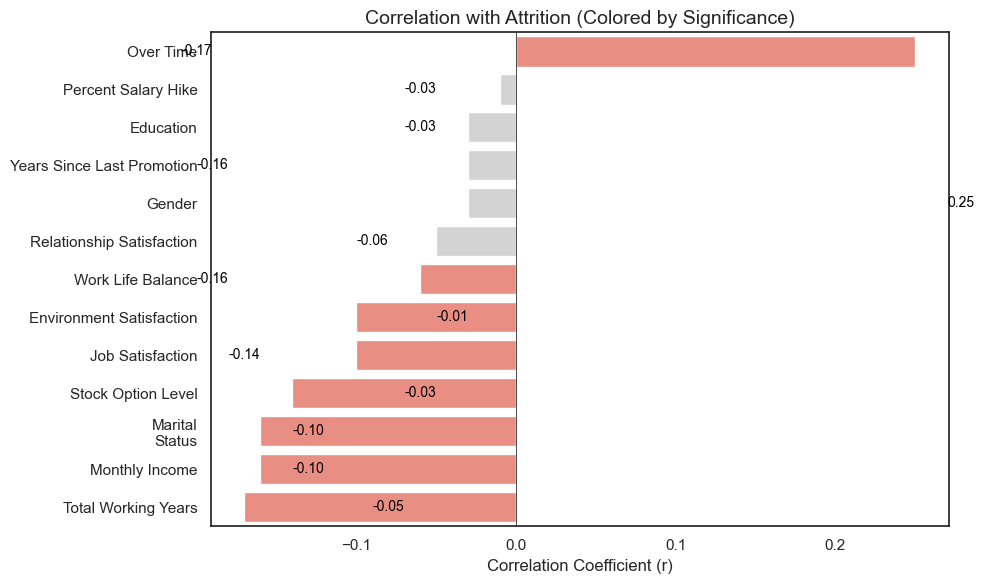

In [35]:
# import packages
import matplotlib.pyplot as plt
import seaborn as sns

# Sort by correlation value
correlation_df = correlations.copy()
correlation_df = correlation_df.sort_values(by="Correlation (r)", ascending=False)

# Set up the plot
plt.figure(figsize=(10, 6))
sns.set(style="white")

# Add a new column for color grouping
correlation_df["Significance Group"] = correlation_df["Significant (p < 0.05)"]

# Create barplot with `hue` to control color by significance
ax = sns.barplot(
    x="Correlation (r)",
    y="Variable",
    hue="Significance Group",
    data=correlation_df,
    dodge=False,
    palette={"Yes": "salmon", "No": "lightgray"},
    legend=False  # hides legend since you already know what colors mean
)

# Add text labels for r values
for i, row in correlation_df.iterrows():
    offset = 0.02 if row["Correlation (r)"] >= 0 else -0.02
    ha = 'left' if row["Correlation (r)"] >= 0 else 'right'
    ax.text(
        row["Correlation (r)"] + offset,
        i,
        f'{row["Correlation (r)"]:.2f}',
        color='black',
        va='center',
        ha=ha,
        fontsize=10
    )

# Formatting
plt.axvline(x=0, color='black', linewidth=0.5)  # vertical line at 0
plt.title("Correlation with Attrition (Colored by Significance)", fontsize=14)
plt.xlabel("Correlation Coefficient (r)")
plt.ylabel("")
plt.tight_layout()
plt.show()



**Observations**: 
- 9 out of the 13 variables have statistically significant (*p < 0.05*) correlation with attrition, while only 6 are considered meaningful with a threshold of *r = .1* for meaningful correlation. The variables that are both significant and meaningful include **Over Time**, **Total Working Years**, **Monthly Income**, **Age**, **Total Satisfaction Score**, and **Stock Option Level**. 
- Out of the variables that are significant and meaningful, only **Over Time** is positively correlated with attrition, with a correlation of *r = .25*. While significant, none of the negative correlations are as high as **Over Time**, with the highest being **Total Working Years** (*r = -.17*). 
- Although **Environment Satisfaction**, **Job Satisfaction**, and **Relationship Satisfaction** appear either insignificant or not meaningful, the composite score **Total Satisfaction Score** is negatively correlated with attrition with a correlational coefficient of *r = -.15*. 
- 2 variables under the dimension of **Compensation** appear to be significant and meaningful, including **Total Working Years** (*r = -.17*) and **Monthly Income** (*r = -.16*). 

**Takeaways**: 
- **Over Time** likely has a relatively strong impact on attrition in this company and needs further investigation for causational effect. 
- **Compensation** seems to have a contributing impact on attrition, despite its smaller correlational coefficient compared to **Over Time**
- Employee attitude is complicated and should be considered as a whole. The relationship between **Total Satisfaction Score** and its sub-variables is worth digging into. 

## Next Steps...

Now that we have identified the variables that have significant and meaningful correlations with attrition, we need to investigate the causational effects. Therefore, the next step is to conduct *regression analysis* to test the predictive effects of these variables. 
